# Final Project 2 (PYTN-KS18)
##### Anggota Kelompok :
1. Abraham Linggom Tampubolon
2. Farhan Ihtifazhuddin
3. Meila Suci

# Perkenalan
#### A. Latar Belakang:
Kasus yang kita pilih dalam proyek ini adalah analisis cuaca harian di Australia selama sekitar 10 tahun terakhir. Australia adalah negara yang luas dengan iklim yang bervariasi. Cuaca sangat mempengaruhi di negara dengan iklim beragam seperti Australia. Cuaca dan hujan yang dapat diprediksi dengan baik memiliki dampak besar pada berbagai sektor, termasuk pertanian, pengelolaan sumber daya air, keamanan pangan, dan kesejahteraan masyarakat. Oleh karena itu, proyek ini bertujuan untuk mengembangkan model pembelajaran mesin yang dapat memprediksi kemungkinan hujan besok berdasarkan data cuaca harian selama  10 tahun terakhir. Dengan berfokus pada variabel RainTomorrow, yang menunjukkan  akan turunnya hujan atau tidak,  model ini diharapkan dapat memberikan informasi  berharga kepada pemangku kepentingan untuk mengambil keputusan yang lebih baik terkait kemungkinan perubahan cuaca.

#### B. Data yang Digunakan:
Dataset yang digunakan dalam proyek ini adalah "weatherAUS.csv". Data yang digunakan berasal dari pengamatan cuaca harian yang dilakukan di berbagai lokasi di negara Australia. Dataset ini berisi informasi tentang atribut-atribut yang terkait dengan cuaca seperti tanggal, lokasi, minTemp, maxTemp, Evaporation, Sunshine, windgustdir (arah lonjakan angin), windgustspeed(kecepatan angin) dan atribut lainnya yang relevan. Dataset ini memiliki sejumlah kolom yang mencakup informasi yang relevan untuk analisis cuaca. Berikut ini adalah informasi dataset yang digunakan.

- Date: Informasi tanggal pada hari itu.

- Location: Daerah yang mencakup nama kota di Australia.

- MinTemp: Suhu terendah pada hari itu.

- MaxTemp: Suhu tertinggi pada hari itu.

- Rainfall: Jumlah hujan yang turun.

- Evaporation: Jumlah penguapan dalam milimeter.

- Sunshine: Durasi bersinar matahari pada hari itu.

- WindGustDir: Arah angin dengan kecepatan tertinggi dalam 24 jam sebelum tengah malam.

- WindGustSpeed: Kecepatan angin tertinggi dalam kilometer per jam dalam 24 jam sebelum tengah malam.

- WindDir9am: Arah angin pada pukul 9 pagi.

- WindDir3pm: Arah angin pada pukul 3 sore.

- WindSpeed9am: Kecepatan angin pada pukul 9 pagi, dihitung dari rata-rata 10 menit sebelum pukul 3 sore.

- WindSpeed3pm: Kecepatan angin pada pukul 3 sore, dihitung dari rata-rata 10 menit sebelum pukul 3 sore.

- Humidity9am: Kelembaban pada pukul 9 pagi dalam persentase.

- Humidity3pm: Kelembaban pada pukul 3 sore dalam persentase.

- Pressure9am: Tekanan udara pada pukul 9 pagi dalam hektopascal.

- Pressure3pm: Tekanan udara pada pukul 3 sore dalam hektopascal.

- Cloud9am: Persentase langit yang tertutup awan pada pukul 9 pagi, dihitung dalam oktas.

- Cloud3pm: Persentase langit yang tertutup awan pada pukul 3 sore.

- Temp9am: Suhu pada pukul 9 pagi dalam Celsius.

- Temp3pm: Suhu pada pukul 3 sore dalam Celsius.

- RainToday: Indikator apakah hari itu hujan atau tidak, berdasarkan curah hujan 24 jam sebelum pukul 9 pagi.

- RainTomorrow: Variabel yang akan diprediksi, menunjukkan apakah akan hujan besok.

#### C. Objective yang Ingin Dicapai:
Tujuan dari proyek ini adalah untuk memprediksi apakah akan terjadi hujan besok atau tidak di Australia Dalam analisis ini, kita akan melihat hubungan antara atribut-atribut tertentu dalam dataset "weatherAUS.csv". Selain itu, kita juga akan mempersiapkan data untuk digunakan dalam model regresi logistik dan mesin vektor pendukung (SVM) dan mengimplementasikan model tersebut untuk membuat prediksi cuaca.

Dengan melakukan analisis ini, kita dapat mendapatkan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi kemungkinan terjadinya hujan sehingga bisa mengambil tindakan preventif atau pengaturan rencana yang lebih baik., serta melihat sejauh mana model regresi logistik dan mesin vektor pendukung (SVM) dapat digunakan untuk membuat prediksi cuaca hujan yang akurat.

# Import pustaka
Berikut adalah daftar library yang akan digunakan dalam proyek ini:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import metrics

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Data Loading
Melakukan proses data loading dari dataset "weatherAUS.csv".

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,1007.70,1007.10,8.00,NaN,16.90,21.80,No,No
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,1010.60,1007.80,NaN,NaN,17.20,24.30,No,No
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,W,WSW,19.00,26.00,38.00,30.00,1007.60,1008.70,NaN,2.00,21.00,23.20,No,No
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,SE,E,11.00,9.00,45.00,16.00,1017.60,1012.80,NaN,NaN,18.10,26.50,No,No
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.80,23.40,0.00,NaN,NaN,E,31.00,SE,ENE,13.00,11.00,51.00,24.00,1024.60,1020.30,NaN,NaN,10.10,22.40,No,No
145456,2017-06-22,Uluru,3.60,25.30,0.00,NaN,NaN,NNW,22.00,SE,N,13.00,9.00,56.00,21.00,1023.50,1019.10,NaN,NaN,10.90,24.50,No,No
145457,2017-06-23,Uluru,5.40,26.90,0.00,NaN,NaN,N,37.00,SE,WNW,9.00,9.00,53.00,24.00,1021.00,1016.80,NaN,NaN,12.50,26.10,No,No
145458,2017-06-24,Uluru,7.80,27.00,0.00,NaN,NaN,SE,28.00,SSE,N,13.00,7.00,51.00,24.00,1019.40,1016.50,3.00,2.00,15.10,26.00,No,No


In [3]:
# Melihat dimensi dataset
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Mendeskripsikan variabel numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.00,12.19,6.40,-8.50,7.60,12.00,16.90,33.90
MaxTemp,144199.00,23.22,7.12,-4.80,17.90,22.60,28.20,48.10
Rainfall,142199.00,2.36,8.48,0.00,0.00,0.00,0.80,371.00
Evaporation,82670.00,5.47,4.19,0.00,2.60,4.80,7.40,145.00
Sunshine,75625.00,7.61,3.79,0.00,4.80,8.40,10.60,14.50
WindGustSpeed,135197.00,40.04,13.61,6.00,31.00,39.00,48.00,135.00
WindSpeed9am,143693.00,14.04,8.92,0.00,7.00,13.00,19.00,130.00
WindSpeed3pm,142398.00,18.66,8.81,0.00,13.00,19.00,24.00,87.00
Humidity9am,142806.00,68.88,19.03,0.00,57.00,70.00,83.00,100.00
Humidity3pm,140953.00,51.54,20.80,0.00,37.00,52.00,66.00,100.00


In [6]:
# Mendeskripsikan variabel object
df.describe(include=object).T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


# Data Cleaning
Melakukan proses cleaning pada data, seperti memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dsb.



In [7]:
# Membuat variabel kategorik
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [9]:
# Mengetahui jumlah nilai unik pada tiap kolom
df[categorical].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [10]:
# Cek jumlah Duplikat yang sama persis
df[df.duplicated(keep=False)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [11]:
# Mengonversi tanggal yang saat ini dikodekan sebagai string ke dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Mengekstrak tahun dari kolom tanggal
df['Year'] = df['Date'].dt.year

# Menampilkan lima baris pertama dari kolom 'Year'
print(df['Year'].head())

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64


In [13]:
# Mengekstrak bulan dari kolom tanggal
df['Month'] = df['Date'].dt.month

# Menampilkan lima baris pertama dari kolom 'Month'
print(df['Month'].head())

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64


In [14]:
# Mengekstrak hari dari kolom tanggal
df['Day'] = df['Date'].dt.day

# Menampilkan lima baris pertama dari kolom 'Day'
print(df['Day'].head())

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64


In [15]:
# Definisi fungsi untuk mengonversi bulan menjadi musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [16]:
# Terapkan fungsi pada kolom bulan dan buat kolom musim
df['Season'] = df['Month'].apply(get_season)


In [17]:
# Menghapus kolom Date karena sudah tidak diperlukan
df.drop('Date', axis=1, inplace=True)

In [18]:
# Menghapus kolom location karena memiliki nilai unik yang besar dikhawatirkan terjadi overfitting
df.drop('Location', axis=1, inplace=True)

## Handling missing value

In [19]:
# Memeriksa kolom yang memiliki missing value
pd.DataFrame(df.isna().sum())

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228
WindSpeed9am,1767


In [20]:
# Menghapus kolom-kolom yang tidak relevan karena missing value terlalu tinggi
df = df.drop(columns=["Evaporation", "Sunshine"])

In [21]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71045 entries, 4 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        71045 non-null  float64
 1   MaxTemp        71045 non-null  float64
 2   Rainfall       71045 non-null  float64
 3   WindGustDir    71045 non-null  object 
 4   WindGustSpeed  71045 non-null  float64
 5   WindDir9am     71045 non-null  object 
 6   WindDir3pm     71045 non-null  object 
 7   WindSpeed9am   71045 non-null  float64
 8   WindSpeed3pm   71045 non-null  float64
 9   Humidity9am    71045 non-null  float64
 10  Humidity3pm    71045 non-null  float64
 11  Pressure9am    71045 non-null  float64
 12  Pressure3pm    71045 non-null  float64
 13  Cloud9am       71045 non-null  float64
 14  Cloud3pm       71045 non-null  float64
 15  Temp9am        71045 non-null  float64
 16  Temp3pm        71045 non-null  float64
 17  RainToday      71045 non-null  object 
 18  RainT

In [23]:
df.sample(3)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
76936,9.10,15.10,2.20,NW,28.00,N,N,9.00,15.00,86.00,63.00,1030.20,1027.30,8.00,8.00,10.00,13.80,Yes,No,2014,8,8,Summer
132777,8.20,26.10,0.00,NW,80.00,NNW,NW,33.00,37.00,44.00,22.00,1006.90,1001.00,6.00,7.00,15.20,24.90,No,No,2016,10,15,Autumn
29738,11.50,25.60,0.20,E,28.00,SSW,ENE,6.00,13.00,89.00,59.00,1030.30,1027.00,8.00,8.00,17.70,23.60,No,No,2016,4,14,Spring


In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00,71045.00
mean,13.20,23.84,2.65,41.06,15.77,19.77,67.08,50.66,1017.19,1014.81,4.41,4.49,17.84,22.34,2012.48,6.43,15.72
std,6.45,7.16,9.50,13.37,8.31,8.54,19.03,20.93,6.98,6.93,2.87,2.71,6.61,7.03,2.50,3.42,8.79
min,-6.70,4.10,0.00,9.00,2.00,2.00,0.00,0.00,980.50,977.10,0.00,0.00,-1.00,1.70,2007.00,1.00,1.00
25%,8.30,18.20,0.00,31.00,9.00,13.00,55.00,36.00,1012.60,1010.00,1.00,2.00,12.70,16.90,2010.00,3.00,8.00
50%,12.90,23.40,0.00,39.00,15.00,19.00,68.00,51.00,1017.10,1014.70,5.00,5.00,17.40,21.90,2012.00,6.00,16.00
75%,18.10,29.30,1.00,48.00,20.00,26.00,81.00,65.00,1021.90,1019.50,7.00,7.00,22.90,27.60,2015.00,9.00,23.00
max,31.40,48.10,367.60,126.00,69.00,76.00,100.00,100.00,1040.40,1038.90,8.00,9.00,39.40,46.70,2017.00,12.00,31.00


# Explorasi Data

## Distribusi Rain Today

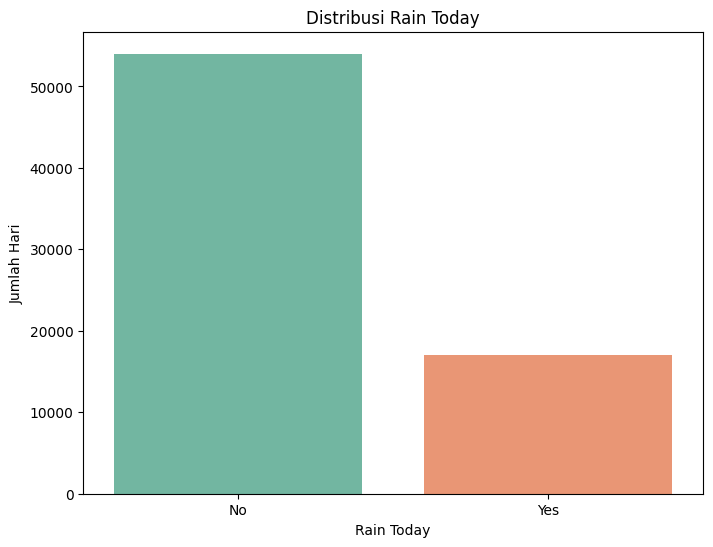

In [25]:
plt.figure(figsize=(8, 6))

sns.countplot(x='RainToday', data=df, palette='Set2')
plt.title('Distribusi Rain Today')
plt.xlabel('Rain Today')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=0)
plt.show()

## Distribusi Rain Tomorrow

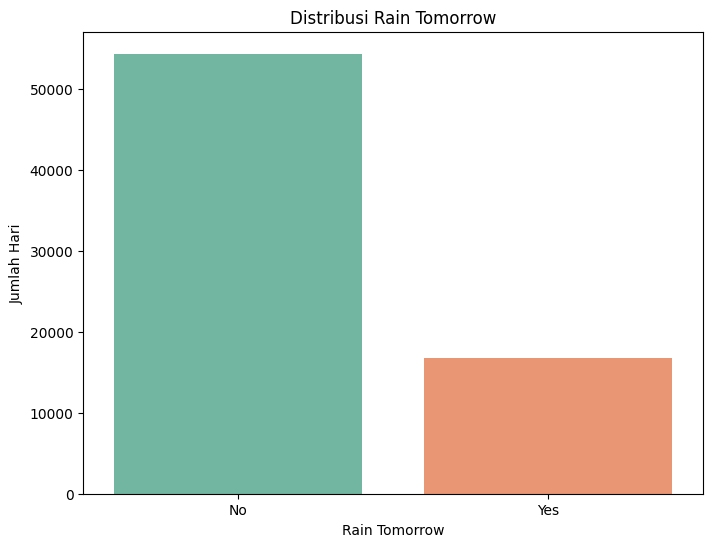

In [26]:
plt.figure(figsize=(8, 6))

sns.countplot(x='RainTomorrow', data=df, palette='Set2')
plt.title('Distribusi Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=0)
plt.show()

## Distribusi Rainfall

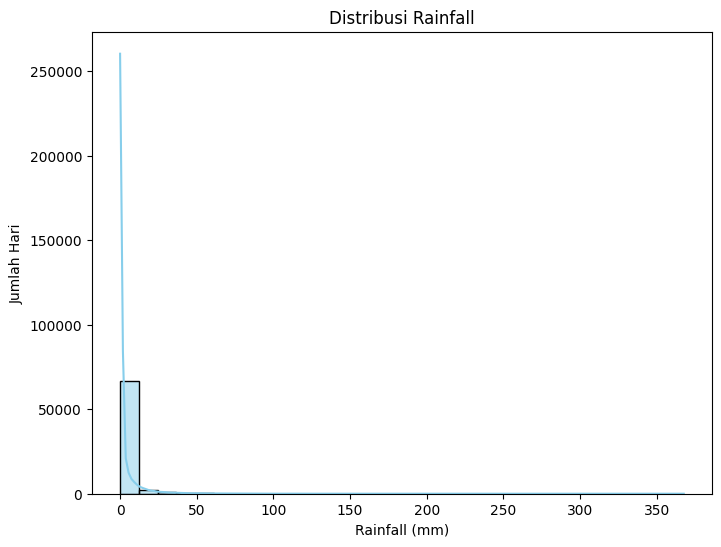

In [27]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Rainfall'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Jumlah Hari')
plt.show()

## Distribusi WindGustSpeed

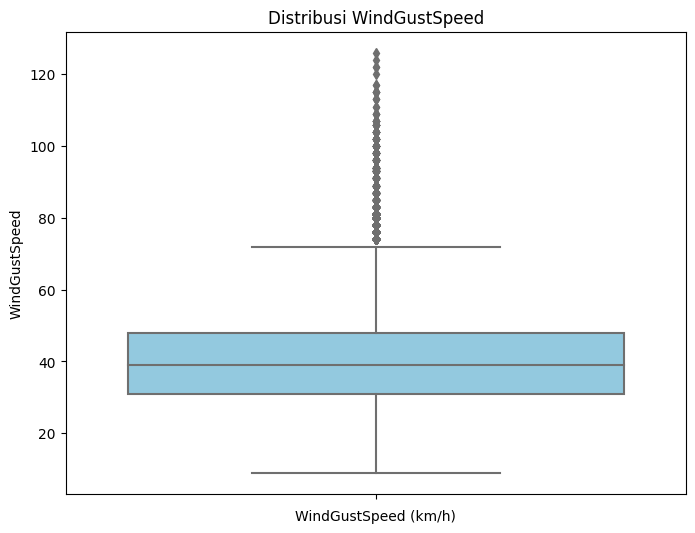

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='WindGustSpeed', data=df, color='skyblue')
plt.title('Distribusi WindGustSpeed')
plt.xlabel('WindGustSpeed (km/h)')
plt.xticks(rotation=0)
plt.show()

## Jumlah Data Berdasarkan Musim

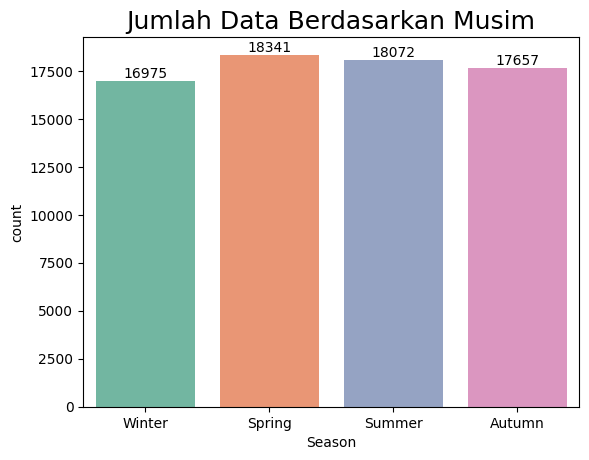

In [29]:
ax = sns.countplot(x='Season', data=df, palette='Set2')
ax.bar_label(ax.containers[0])
plt.title('Jumlah Data Berdasarkan Musim', fontsize=18)
plt.show()


## Grafik curah hujan setiap tahun

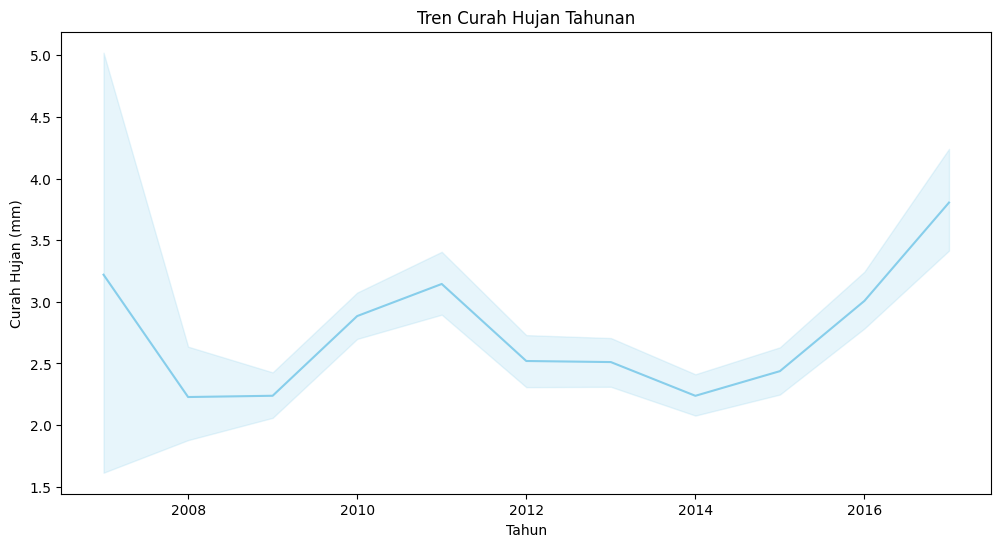

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rainfall', data=df, color='skyblue')
plt.title('Tren Curah Hujan Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (mm)')
plt.show()

## Perubahan Suhu (MinTemp dan MaxTemp)

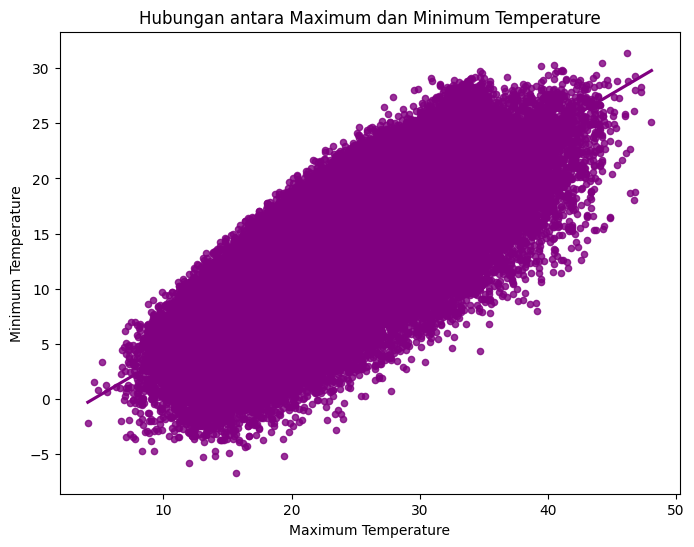

In [31]:
plt.figure(figsize=(8, 6))

sns.regplot(x='MaxTemp', y='MinTemp', data=df, color='purple', scatter_kws={'s': 20})  # menambahkan garis regresi
plt.title('Hubungan antara Maximum dan Minimum Temperature')
plt.xlabel('Maximum Temperature')
plt.ylabel('Minimum Temperature')
plt.show()


## Hubungan antara WindSpeed9am dan WindSpeed3pm

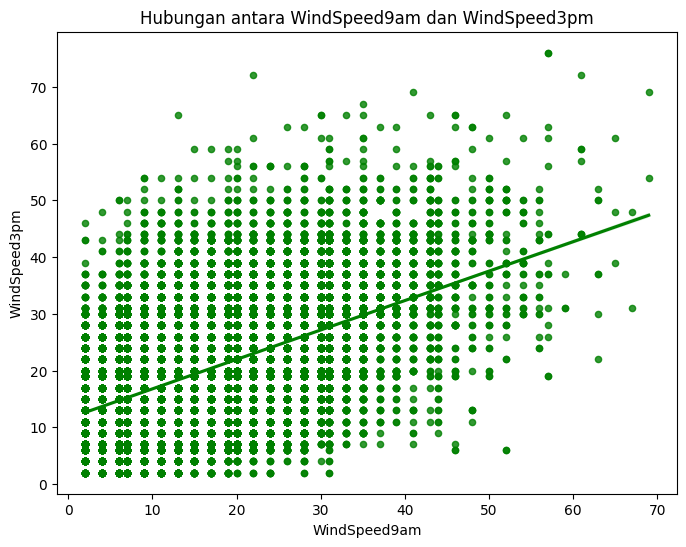

In [32]:
plt.figure(figsize=(8, 6))

sns.regplot(x='WindSpeed9am', y='WindSpeed3pm', data=df, color='green', scatter_kws={'s': 20})  # menambahkan garis regresi
plt.title('Hubungan antara WindSpeed9am dan WindSpeed3pm')
plt.xlabel('WindSpeed9am')
plt.ylabel('WindSpeed3pm')
plt.show()


## Hubungan Curah Hujan terhadap Prediksi Hujan Besok

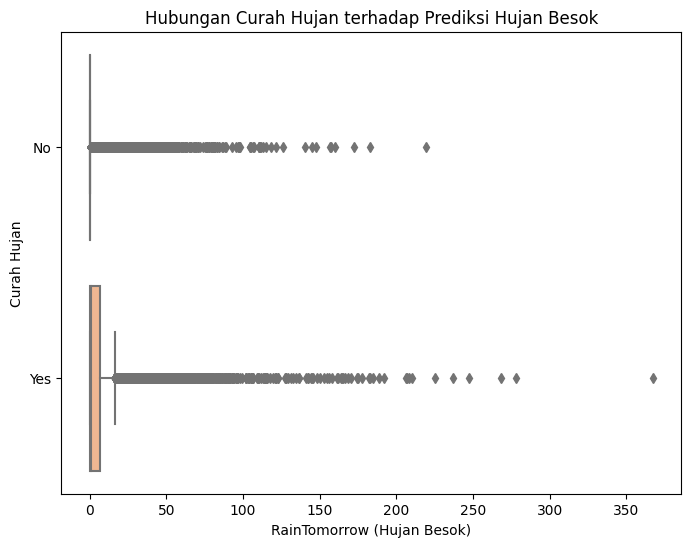

In [33]:
# Plot boxplot untuk Rainfall terhadap RainTomorrow
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y='RainTomorrow', x='Rainfall', palette='pastel')
plt.title('Hubungan Curah Hujan terhadap Prediksi Hujan Besok')
plt.xlabel('RainTomorrow (Hujan Besok)')
plt.ylabel('Curah Hujan')
plt.show()

## Kelembapan udara di pagi hari terhadap Prediksi Hujan Besok

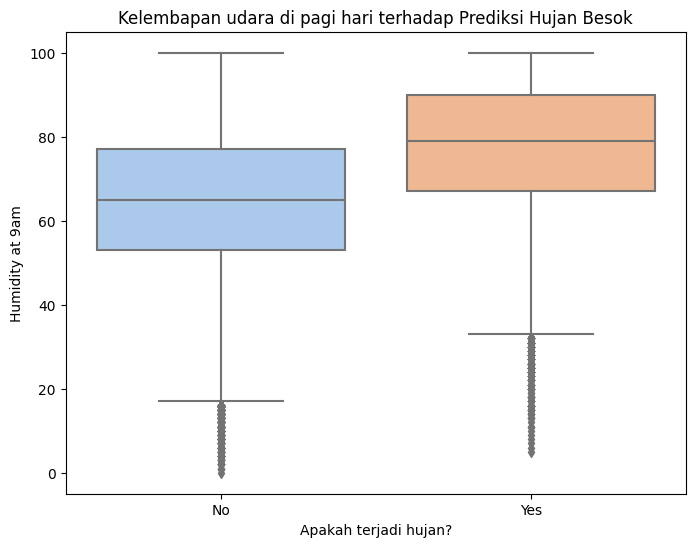

In [34]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y="Humidity9am", x="RainTomorrow", palette='pastel')
plt.title("Kelembapan udara di pagi hari terhadap Prediksi Hujan Besok")
plt.xlabel("Apakah terjadi hujan?")
plt.ylabel("Humidity at 9am")
plt.show()

## Tekanan udara di pagi hari terhadap Prediksi Hujan Besok

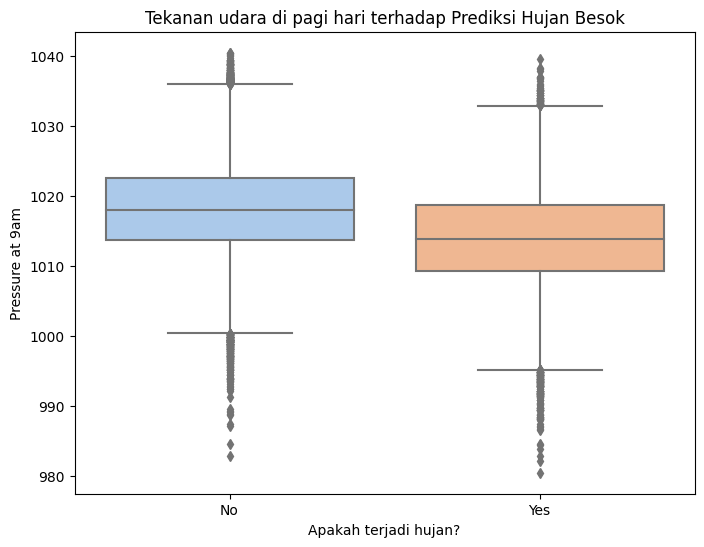

In [35]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y="Pressure9am", x="RainTomorrow", palette='pastel')
plt.title("Tekanan udara di pagi hari terhadap Prediksi Hujan Besok")
plt.xlabel("Apakah terjadi hujan?")
plt.ylabel("Pressure at 9am")
plt.show()

## Kelembapan udara di sore hari terhadap Prediksi Hujan Besok

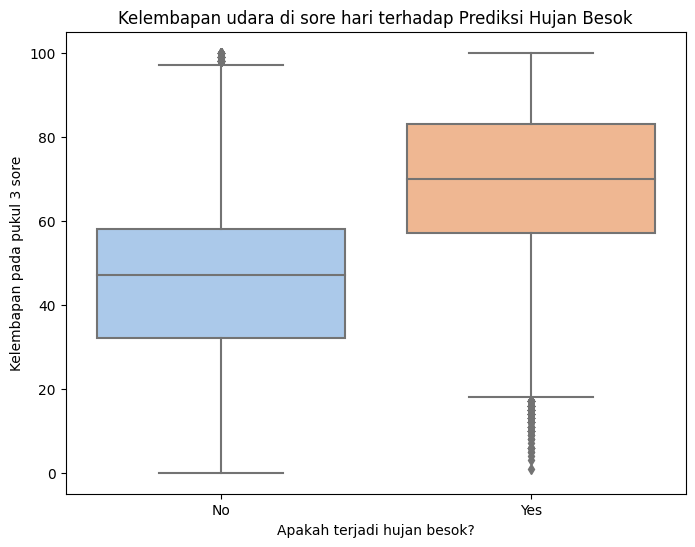

In [36]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y="Humidity3pm", x="RainTomorrow", palette='pastel')
plt.title("Kelembapan udara di sore hari terhadap Prediksi Hujan Besok")
plt.xlabel("Apakah terjadi hujan besok?")
plt.ylabel("Kelembapan pada pukul 3 sore")
plt.show()


## Tekanan udara di sore hari terhadap Prediksi Hujan Besok

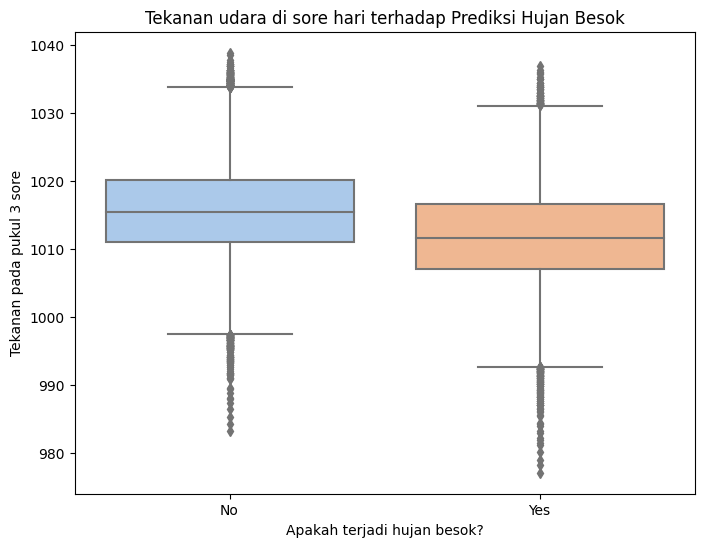

In [37]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y="Pressure3pm", x="RainTomorrow", palette='pastel')
plt.title("Tekanan udara di sore hari terhadap Prediksi Hujan Besok")
plt.xlabel("Apakah terjadi hujan besok?")
plt.ylabel("Tekanan pada pukul 3 sore")
plt.show()


# Data Preprocessing

## Outlier

Outlier merupakan nilai yang jauh berbeda dengan nilai yang lain pada dataset. Nilai ini dapat menjadi masalah dan memengaruhi hasil analisis, sehingga nilai outlier perlu dihapus

In [38]:
# Menghitung IQR
IQR = df['Rainfall'].quantile(0.75) - df['Rainfall'].quantile(0.25)

# Menghitung batas bawah dan batas atas
lower_bridge = df['Rainfall'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['Rainfall'].quantile(0.75) + (IQR * 1.5)

print(lower_bridge, upper_bridge)

-1.5 2.5


In [39]:
# Menghapus outlier RainFall
df = df.loc[(df['Rainfall'] >= lower_bridge) & (df['Rainfall'] <= upper_bridge)]

In [40]:
# Mengubah menjadi data numerik
df['WindSpeed9am'] = pd.to_numeric(df['WindSpeed9am'], errors='coerce')

# Hitung IQR
IQR = df['WindSpeed9am'].quantile(0.75) - df['WindSpeed9am'].quantile(0.25)

# Hitung batas bawah dan batas atas
lower_bridge = df['WindSpeed9am'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['WindSpeed9am'].quantile(0.75) + (IQR * 1.5)

print(lower_bridge, upper_bridge)


-7.5 36.5


In [41]:
# Menghapus outlier WindSpeed9am
df = df.loc[(df['WindSpeed9am'] >= lower_bridge) & (df['WindSpeed9am'] <= upper_bridge)]

In [42]:
# Mengubah menjadi data numerik
df['WindSpeed3pm'] = pd.to_numeric(df['WindSpeed3pm'], errors='coerce')

# Hitung IQR
IQR = df['WindSpeed3pm'].quantile(0.75) - df['WindSpeed3pm'].quantile(0.25)

# Hitung batas bawah dan batas atas
lower_bridge = df['WindSpeed3pm'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['WindSpeed3pm'].quantile(0.75) + (IQR * 1.5)

print(lower_bridge, upper_bridge)


-3.5 40.5


In [43]:
# Menghapus outlier WindSpeed3pm
df = df.loc[(df['WindSpeed3pm'] >= lower_bridge) & (df['WindSpeed3pm'] <= upper_bridge)]

## Encoding

Pada Encoding, dataset tersebut diubah yang sebelumnya kategori/label menjadi numerik atau angka.

In [44]:
# Mengubah kolom 'RainToday'
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})

# Mengubah kolom 'RainTomorrow'
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [45]:
# Mengkategorikan data yang akan di Encoding
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()

In [46]:
object_columns

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Season']

In [47]:
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day']

In [48]:
# Mengetahui jumlah nilai unik pada tiap kolom
df[object_columns].nunique()

WindGustDir    16
WindDir9am     16
WindDir3pm     16
Season          4
dtype: int64

In [49]:
df[numeric_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [50]:
df[object_columns].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
Season         0
dtype: int64

In [51]:
df[numeric_columns]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
4,17.50,32.30,1.00,41.00,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,0,0,2008,12,5
11,15.90,21.70,2.20,31.00,15.00,13.00,89.00,91.00,1010.50,1004.20,8.00,8.00,15.90,17.00,1,1,2008,12,12
16,14.10,20.90,0.00,22.00,11.00,9.00,69.00,82.00,1012.20,1010.40,8.00,1.00,17.20,18.10,0,1,2008,12,17
29,12.50,24.20,1.20,50.00,11.00,22.00,78.00,70.00,1005.60,1003.40,8.00,8.00,12.50,18.20,1,0,2008,12,30
70,18.40,31.20,0.40,37.00,7.00,11.00,66.00,31.00,1009.30,1007.80,7.00,8.00,18.70,29.40,0,0,2009,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145398,15.60,27.30,0.00,41.00,13.00,15.00,77.00,45.00,1018.00,1014.90,8.00,4.00,19.30,26.40,0,0,2017,4,25
145428,14.60,26.30,0.00,37.00,19.00,20.00,61.00,36.00,1022.00,1018.60,7.00,1.00,15.40,25.00,0,0,2017,5,25
145432,12.70,22.20,0.00,37.00,19.00,13.00,59.00,34.00,1024.30,1021.70,8.00,8.00,13.90,21.00,0,0,2017,5,29
145433,9.40,22.70,0.00,35.00,13.00,17.00,62.00,32.00,1026.60,1023.60,8.00,4.00,11.80,22.30,0,0,2017,5,30


In [52]:
# Membuat salinan DataFrame
df_encoded = df.copy()

In [53]:
# Sebelum encoding
df_encoded.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
4,17.50,32.30,1.00,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,0,0,2008,12,5,Winter
11,15.90,21.70,2.20,NNE,31.00,NE,ENE,15.00,13.00,89.00,91.00,1010.50,1004.20,8.00,8.00,15.90,17.00,1,1,2008,12,12,Winter
16,14.10,20.90,0.00,ENE,22.00,SSW,E,11.00,9.00,69.00,82.00,1012.20,1010.40,8.00,1.00,17.20,18.10,0,1,2008,12,17,Winter
29,12.50,24.20,1.20,WNW,50.00,WSW,SW,11.00,22.00,78.00,70.00,1005.60,1003.40,8.00,8.00,12.50,18.20,1,0,2008,12,30,Winter
70,18.40,31.20,0.40,SE,37.00,SW,WSW,7.00,11.00,66.00,31.00,1009.30,1007.80,7.00,8.00,18.70,29.40,0,0,2009,2,9,Winter


In [54]:
# Melakukan encoding menggunakan LabelEncoder
label_encoder = LabelEncoder()
for column in object_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column])

# Menampilkan hasil setelah encoding
df_encoded.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
4,17.50,32.30,1.00,13,41.00,1,7,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,0,0,2008,12,5,3
11,15.90,21.70,2.20,5,31.00,4,1,15.00,13.00,89.00,91.00,1010.50,1004.20,8.00,8.00,15.90,17.00,1,1,2008,12,12,3
16,14.10,20.90,0.00,1,22.00,11,0,11.00,9.00,69.00,82.00,1012.20,1010.40,8.00,1.00,17.20,18.10,0,1,2008,12,17,3
29,12.50,24.20,1.20,14,50.00,15,12,11.00,22.00,78.00,70.00,1005.60,1003.40,8.00,8.00,12.50,18.20,1,0,2008,12,30,3
70,18.40,31.20,0.40,9,37.00,12,15,7.00,11.00,66.00,31.00,1009.30,1007.80,7.00,8.00,18.70,29.40,0,0,2009,2,9,3


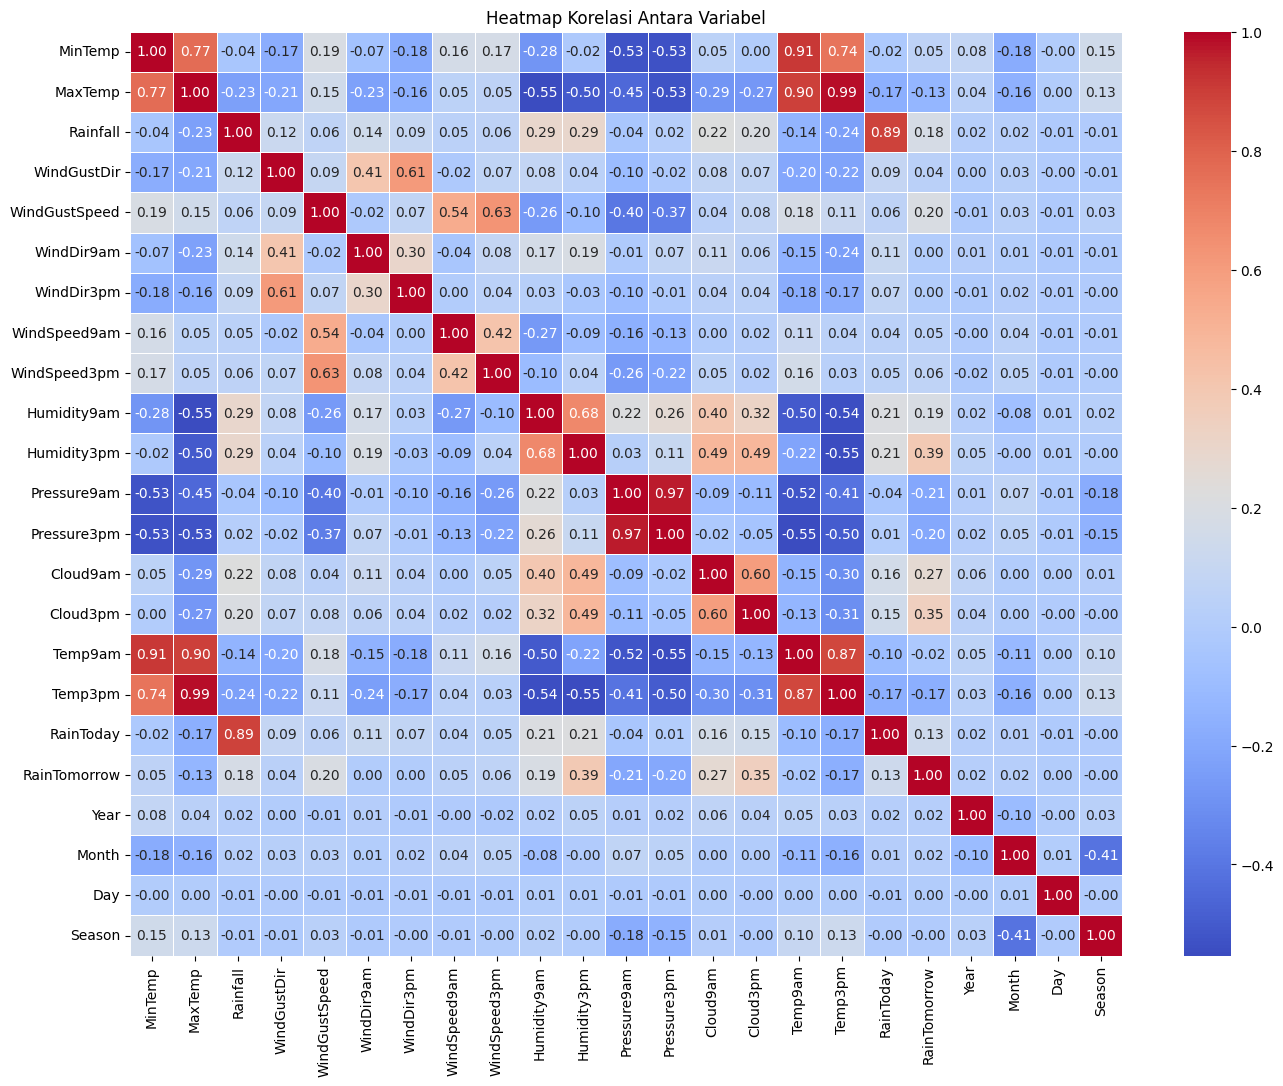

In [55]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

In [56]:
# Menghapus data-data yang memiliki korelasi kecil
df_encoded = df_encoded.drop(columns=['Year', 'Month', 'Day', 'Season'])

In [57]:
df_encoded.sample(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
23907,16.50,20.70,1.00,11,63.00,12,11,33.00,39.00,60.00,54.00,1012.40,1012.10,8.00,8.00,19.60,18.40,0,1
21510,18.40,26.00,0.00,2,33.00,1,10,17.00,15.00,67.00,58.00,1015.00,1013.90,5.00,3.00,23.50,24.30,0,0
142273,24.30,31.90,0.00,2,50.00,2,0,20.00,20.00,48.00,38.00,1013.30,1010.10,1.00,0.00,27.10,31.30,0,0
34353,10.60,16.10,0.00,12,61.00,13,12,28.00,28.00,48.00,30.00,1016.20,1017.80,1.00,6.00,12.20,15.90,0,0
130033,12.90,20.10,1.00,9,35.00,2,9,15.00,26.00,54.00,53.00,1015.10,1017.00,6.00,3.00,17.50,17.70,0,0


In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56638 entries, 4 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56638 non-null  float64
 1   MaxTemp        56638 non-null  float64
 2   Rainfall       56638 non-null  float64
 3   WindGustDir    56638 non-null  int64  
 4   WindGustSpeed  56638 non-null  float64
 5   WindDir9am     56638 non-null  int64  
 6   WindDir3pm     56638 non-null  int64  
 7   WindSpeed9am   56638 non-null  float64
 8   WindSpeed3pm   56638 non-null  float64
 9   Humidity9am    56638 non-null  float64
 10  Humidity3pm    56638 non-null  float64
 11  Pressure9am    56638 non-null  float64
 12  Pressure3pm    56638 non-null  float64
 13  Cloud9am       56638 non-null  float64
 14  Cloud3pm       56638 non-null  float64
 15  Temp9am        56638 non-null  float64
 16  Temp3pm        56638 non-null  float64
 17  RainToday      56638 non-null  int64  
 18  RainT

In [59]:
# Menyimpan DataFrame ke dalam file pickle
df_encoded.to_pickle('df_encoded.pkl')

## Normalization

In [60]:
# Memisahkan variabel independen (X) dan variabel dependen (y)
X = df_encoded.drop(columns='RainTomorrow', axis=1)
y = df_encoded['RainTomorrow']


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [62]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [63]:
# Standarisasi atribut prediktor (x)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
print('X train (baris,kolom) : ', X_train.shape)
print('X test  (baris,kolom) : ', X_test.shape)
print('\ny train (baris,kolom) : ', y_train.shape)
print('y test  (baris,kolom) : ', y_test.shape)

X train (baris,kolom) :  (65762, 18)
X test  (baris,kolom) :  (16992, 18)

y train (baris,kolom) :  (65762,)
y test  (baris,kolom) :  (16992,)


# Pendefinisian Model

Setelah dilakukan data cleaning dan data preprocessing, data tersebut kemudian akan digunakan untuk pelatihan model. Model yang akan dipakai pada project ini adalah Support Vector Machine dan Linear Regression. Support Vector Machine adalah algoritma yang dikenal karena kemampuannya dalam menangani data dengan baik, terutama dalam pemisahan dua kelas atau lebih. Sedangkan Linear Regression adalah algoritma yang menggunakan prinsip regresi yang paling sederhana dan banyak digunakan serta kemudahan dalam interpretasi hasil.

## Pelatihan Model

Pelatihan model merupakan proses untuk menjalankan algoritma yang didalamnya sudah terbagi menjadi data training untuk mendapatkan output tertentu

### Logistic Regression

In [65]:
# Logistik Regression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)


In [66]:
# Prediksi data pada logistik regression
y_pred_lr = lr.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, lr.predict(X_test))

# Tampilkan akurasi
print('Akurasi pada Logistic Regression: ', accuracy)

Akurasi pada Logistic Regression:  0.7959039548022598


In [68]:
print('Intercept: ', lr.intercept_)
print('Koefisien (Slope): ', lr.coef_)

Intercept:  [0.17046632]
Koefisien (Slope):  [[-0.02603034 -0.31776913  0.44098802  0.10112767  1.01430506 -0.25325354
  -0.06398334 -0.17802088 -0.34695976 -0.24752096  1.86282306  1.96470431
  -2.84165483  0.2384981   0.97358323 -0.07341832  0.16776985 -2.76919919]]


### Support Vector Machine

In [69]:
# Membuat model SVM
svm = SVC(kernel='linear', random_state=0).fit(X_train, y_train)

In [70]:
# Prediksi data pada svm
y_pred_svm = svm.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, svm.predict(X_test))

# Tampilkan akurasi
print('Akurasi pada Support Vector machine: ', accuracy)

Akurasi pada Support Vector machine:  0.7953154425612052


In [72]:
print('Intercept : ', svm.intercept_)
print('Koefisien (Slope): ', svm.coef_)

Intercept :  [0.13674391]
Koefisien (Slope):  [[-0.02729135 -0.28758679  0.33194306  0.08537088  0.85423724 -0.18012198
  -0.04063691 -0.13472094 -0.30615915 -0.16137671  1.4056048   1.61884085
  -2.30176908  0.18331725  0.73363306 -0.07049612  0.19554734 -2.06571424]]


# Evaluasi Model


Evaluasi model merupakan menguji akurasi dari data testing. Evaluasi dilakukan dengan menggunakan akurasi (accuracy), presisi (precision), recall, F1-score, dan matriks konfusi.
- Accuracy        : Mengukur sejauh mana model berhasil memprediksi dengan benar semua kelas (positif dan negatif) dibandingkan dengan total prediksi.
- Precision       : Mengukur sejauh mana prediksi positif dari model adalah benar. Ini memberikan informasi tentang seberapa baik model melakukan klasifikasi positif.
- Recall          : Mengukur sejauh mana model dapat mengidentifikasi keseluruhan kelas positif. Ini memberikan informasi tentang seberapa baik model mengatasi kelas positif.
- F1 Score        : Menggabungkan presisi dan recall dalam satu metrik tunggal. Ini berguna ketika kita ingin mencari keseimbangan antara presisi dan recall.
- Matriks konfusi : Tabel yang digunakan untuk mengevaluasi kinerja model, terutama pada tugas klasifikasi. Ini menyajikan jumlah True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).

### Logistik Regression

### Accuracy, Precision, Recall, F1 Score

In [73]:
# Evaluasi X_test
y_pred_lr = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred_lr)
print('Precision:', precision)

recall = recall_score(y_test, y_pred_lr)
print('Recall:', recall)

f1 = f1_score(y_test, y_pred_lr)
print('F1 Score:', f1)

Accuracy: 0.7959039548022598
Precision: 0.4436647955092221
Recall: 0.7615278733654508
F1 Score: 0.5606789967063593


In [74]:
# Classification Report
report = classification_report(y_test, y_pred_lr)

# Tampilkan laporan
print(report)

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     14086
           1       0.44      0.76      0.56      2906

    accuracy                           0.80     16992
   macro avg       0.69      0.78      0.71     16992
weighted avg       0.86      0.80      0.81     16992



In [75]:
# Evaluasi X_train
y_pred_lr_train = lr.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_lr_train)
print('Accuracy:', accuracy)

precision = precision_score(y_train, y_pred_lr_train)
print('Precision:', precision)

recall = recall_score(y_train, y_pred_lr_train)
print('Recall:', recall)

f1 = f1_score(y_train, y_pred_lr_train)
print('F1 Score:', f1)

Accuracy: 0.7976947173139503
Precision: 0.8021421736580547
Recall: 0.7903348438307838
F1 Score: 0.7961947363583443


In [76]:
# Classification Report
report = classification_report(y_train, y_pred_lr_train)

# Tampilkan laporan
print(report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     32881
           1       0.80      0.79      0.80     32881

    accuracy                           0.80     65762
   macro avg       0.80      0.80      0.80     65762
weighted avg       0.80      0.80      0.80     65762



### Confusion Matrix

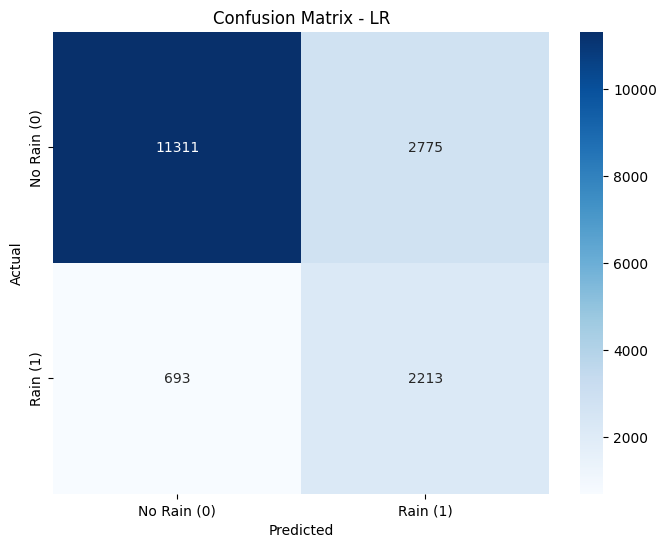

In [77]:
# Prediksi dari model Linear Regression
y_pred_lr = lr.predict(X_test)

# Confusion Matrix
conf_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain (0)', 'Rain (1)'], yticklabels=['No Rain (0)', 'Rain (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LR')
plt.show()


Confusion Matrix adalah tabel yang digunakan dalam evaluasi kinerja model klasifikasi.

True Negative (TN):
Jumlah pengamatan negatif yang benar-benar diprediksi sebagai negatif oleh model. Dalam konteks ini, "No Rain" diprediksi dengan benar sebagai "No Rain."

True Positive (TP):
Jumlah pengamatan positif yang benar-benar diprediksi sebagai positif oleh model. Dalam konteks ini, "Rain" diprediksi dengan benar sebagai "Rain."

False Negative (FN):
Jumlah pengamatan positif yang salah diprediksi sebagai negatif oleh model. Dalam konteks ini, "Rain" salah diprediksi sebagai "No Rain."

False Positive (FP):
Jumlah pengamatan negatif yang salah diprediksi sebagai positif oleh model. Dalam konteks ini, "No Rain" salah diprediksi sebagai "Rain."

Confusion Matrix ini memberikan gambaran mengenai seberapa baik model kami bekerja dalam memprediksi kelas target (RainTomorrow).

### Support vector Machine

### Accuracy, Precision, Recall, F1 Score

In [78]:
# Evaluasi X_test
y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred_svm)
print('Precision:', precision)

recall = recall_score(y_test, y_pred_svm)
print('Recall:', recall)

f1 = f1_score(y_test, y_pred_svm)
print('F1 Score:', f1)

Accuracy: 0.7953154425612052
Precision: 0.44298245614035087
Recall: 0.7646249139710943
F1 Score: 0.5609694521585459


In [79]:
# Classification Report
report = classification_report(y_test, y_pred_svm)

# Tampilkan laporan
print(report)

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     14086
           1       0.44      0.76      0.56      2906

    accuracy                           0.80     16992
   macro avg       0.69      0.78      0.71     16992
weighted avg       0.86      0.80      0.81     16992



In [80]:
# Evaluasi X_train
y_pred_svm_train = svm.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_svm_train)
print('Accuracy:', accuracy)

precision = precision_score(y_train, y_pred_svm_train)
print('Precision:', precision)

recall = recall_score(y_train, y_pred_svm_train)
print('Recall:', recall)

f1 = f1_score(y_train, y_pred_svm_train)
print('F1 Score:', f1)

Accuracy: 0.797983637967215
Precision: 0.8014398227910411
Recall: 0.7922508439524345
F1 Score: 0.7968188422421044


In [81]:
# Classification Report
report = classification_report(y_train, y_pred_svm_train)

# Tampilkan laporan
print(report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     32881
           1       0.80      0.79      0.80     32881

    accuracy                           0.80     65762
   macro avg       0.80      0.80      0.80     65762
weighted avg       0.80      0.80      0.80     65762



### Confusion Matrix


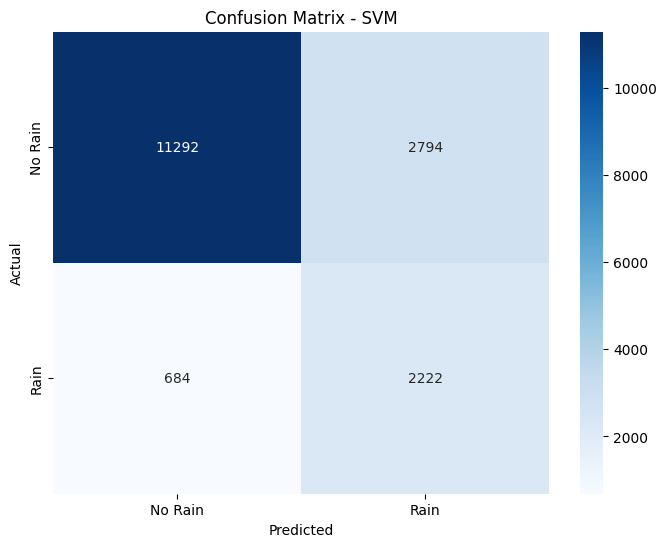

In [82]:
# Prediksi dari model SVM
y_pred_svm = svm.predict(X_test)

# Confusion Matrix
conf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


Confusion Matrix adalah tabel yang digunakan dalam evaluasi kinerja model klasifikasi.

True Negative (TN):
Jumlah pengamatan negatif yang benar-benar diprediksi sebagai negatif oleh model. Dalam konteks ini, "No Rain" diprediksi dengan benar sebagai "No Rain."

True Positive (TP):
Jumlah pengamatan positif yang benar-benar diprediksi sebagai positif oleh model. Dalam konteks ini, "Rain" diprediksi dengan benar sebagai "Rain."

False Negative (FN):
Jumlah pengamatan positif yang salah diprediksi sebagai negatif oleh model. Dalam konteks ini, "Rain" salah diprediksi sebagai "No Rain."

False Positive (FP):
Jumlah pengamatan negatif yang salah diprediksi sebagai positif oleh model. Dalam konteks ini, "No Rain" salah diprediksi sebagai "Rain."

Confusion Matrix ini memberikan gambaran mengenai seberapa baik model kami bekerja dalam memprediksi kelas target (RainTomorrow).

# Model Inference

Model Inference merupakan pelatihan model yang kita buat dengan data selain data yang sudah tersedia. Model tersebut kita latih dengan data yang telah dibuat seperti dibawah ini.

In [86]:
df_new = pd.DataFrame({
    'MinTemp': [37, 196, 100, 20],
    'MaxTemp': [37, 138, 112, 24],
    'Rainfall': [60, 42, 42, 22],
    'WindGustDir': [13, 6, 10, 8],
    'WindGustSpeed': [0, 9, 14, 7],
    'WindDir9am': [15, 0, 5, 2],
    'WindDir3pm': [4, 1, 6, 8],
    'WindSpeed9am': [4, 13, 2, 6],
    'WindSpeed3pm': [12, 11, 8, 5],
    'Humidity9am': [65, 55, 44, 38],
    'Humidity3pm': [17, 61, 23, 69],
    'Pressure9am': [166, 46, 39, 157],
    'Pressure3pm': [71, 12, 53, 76],
    'Cloud9am' : [5, 4, 7, 5],
    'Cloud3pm' : [3, 1, 3, 4],
    'Temp9am': [103, 64, 8, 103],
    'Temp3pm': [73, 29, 45, 159],
    'RainToday': [1, 1, 0, 0],
})

In [87]:
df_new

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,37,37,60,13,0,15,4,4,12,65,17,166,71,5,3,103,73,1
1,196,138,42,6,9,0,1,13,11,55,61,46,12,4,1,64,29,1
2,100,112,42,10,14,5,6,2,8,44,23,39,53,7,3,8,45,0
3,20,24,22,8,7,2,8,6,5,38,69,157,76,5,4,103,159,0


In [88]:
# Melakukan prediksi menggunakan model Logistic Regression
y_pred_new_lr = lr.predict(df_new)
y_pred_new_lr


array([1, 1, 0, 1])

In [89]:
# Melakukan prediksi menggunakan model Support Vector Machine
y_pred_new_svm = svm.predict(df_new)
y_pred_new_svm


array([1, 1, 0, 1])

# Kesimpulan

- Dataset weatherAUS.csv berisi informasi cuaca harian, termasuk parameter-parameter seperti suhu, kelembapan, kecepatan angin, dan lainnya.
- Kami melakukan explorasi data untuk memahami distribusi variabel dan hubungan antar variabel dalam dataset dengan target ("RainTomorrow")
- Data memerlukan beberapa langkah preprocessing untuk mengatasi nilai yang hilang, duplikat, dan outlier.
- Menghapus kolom kolom yang tidak diperlukan dan membangun model Logistic Regression dan Support Vector Machine (SVM) digunakan untuk memprediksi apakah akan hujan besok(RainTomorrow) dan disertai SMOTE untuk menangani ketidakseimbangan kelas pada target variable.
- Masing masing model dievaluasi menggunakan akurasi (accuracy), presisi (precision), recall, F1-score, dan confusion matrix.

### Analisis
- Baik Logistic Regression maupun Support Vector Machine (SVM) memberikan tingkat akurasi yang cukup baik, dengan Logistic Regression sekitar 79.59% dan SVM sekitar 79.53%.
- Kedua model memberikan performa yang sebanding dan tingkat akurasi yang baik dalam memprediksi, namun dalam project ini kami lebih memilih Logistic Regresion karena Logistic Regression cenderung lebih cepat dalam pelatihan dan prediksi dibandingkan dengan SVM, terutama ketika datanya cukup besar.
- Kedua model menunjukkan True Negative (TN) dan True Positive (TP) yang baik.
- Model Logistic Regression lebih mudah diinterpretasikan sementara interpretasi SVM lebih rumit karena melibatkan vektor bobot dan fungsi kernel.

### Logistic Regresion
- Ada 11,311 data sebagai "No Rain" yang sebenarnya tidak hujan (TN).
- Ada 2,775 data yang sebenarnya tidak hujan, tetapi model memprediksi sebagai hujan (FP).
- Ada 693 data yang sebenarnya hujan, tetapi model memprediksi sebagai tidak hujan (FN).
- Ada 2,213 data sebagai "Rain" yang sebenarnya hujan (TP).

### Support Vector Machine
- Ada 11,292 data sebagai "No Rain" yang sebenarnya tidak hujan (TN).
- Ada 2,794 data yang sebenarnya tidak hujan, tetapi model memprediksi sebagai hujan (FP).
- Ada 684 data yang sebenarnya hujan, tetapi model memprediksi sebagai tidak hujan (FN).
- Ada 2,222 data sebagai "Rain" yang sebenarnya hujan (TP).

### Akhir Kata
- Melalui project ini, diharapkan dapat memberikan pemahaman yang lebih baik tentang faktor-faktor apa yang dapat mempengaruhi prediksi cuaca, serta dapat memberikan prediksi yang akurat untuk membantu dalam pengambilan keputusan terkait cuaca di masa mendatang.
